## Chess_openings


## Abstract
This project utilizes a dataset from https://mavenanalytics.io/ titled "Online Chess Games." The goal is to conduct exploratory data analysis and develop a predictive model to forecast chess game outcomes based on player ratings and opening moves. While chess is notoriously difficult to predict, such a model could be valuable for tournament preparation, helping players select optimal openings against various opponents—both as White and Black—potentially increasing their chances of winning, even slightly so.

This project should dominstrate my abitity to:
1. Comprehend the task and approach it analytically
2. Understand and prepare the data
3. Model using logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [2]:
raw_csv_data = pd.read_csv("chess_games.csv")
raw_csv_data.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [3]:
chess_data = raw_csv_data

In [4]:
data = chess_data[['winner', 'opening_shortname', 'white_rating', 'black_rating']].dropna()
data.head()

,winner,opening_shortname,white_rating,black_rating
0,White,Slav Defense,1500,1191
1,Black,Nimzowitsch Defense,1322,1261
2,White,King's Pawn Game,1496,1500
3,White,Queen's Pawn Game,1439,1454
4,White,Philidor Defense,1523,1469


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   winner             20058 non-null  object
 1   opening_shortname  20058 non-null  object
 2   white_rating       20058 non-null  int64 
 3   black_rating       20058 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 626.9+ KB


In [6]:
data.describe()

,white_rating,black_rating
count,20058.000000,20058.000000
mean,1596.631868,1588.831987
std,291.253376,291.036126
min,784.000000,789.000000
25%,1398.000000,1391.000000
50%,1567.000000,1562.000000
75%,1793.000000,1784.000000
max,2700.000000,2723.000000


In [7]:
data['winner_binary'] = data['winner'].apply(lambda x: 1 if x == 'White' else 0)
data.head()

,winner,opening_shortname,white_rating,black_rating,winner_binary
0,White,Slav Defense,1500,1191,1
1,Black,Nimzowitsch Defense,1322,1261,0
2,White,King's Pawn Game,1496,1500,1
3,White,Queen's Pawn Game,1439,1454,1
4,White,Philidor Defense,1523,1469,1


In [8]:
df = data.drop(["winner"], axis=1)
df.head()

,opening_shortname,white_rating,black_rating,winner_binary
0,Slav Defense,1500,1191,1
1,Nimzowitsch Defense,1322,1261,0
2,King's Pawn Game,1496,1500,1
3,Queen's Pawn Game,1439,1454,1
4,Philidor Defense,1523,1469,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   opening_shortname  20058 non-null  object
 1   white_rating       20058 non-null  int64 
 2   black_rating       20058 non-null  int64 
 3   winner_binary      20058 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 626.9+ KB


In [10]:
df["opening_shortname"].unique()

array(['Slav Defense', 'Nimzowitsch Defense', "King's Pawn Game",
       "Queen's Pawn Game", 'Philidor Defense', 'Sicilian Defense',
       'Blackmar-Diemer Gambit', 'Italian Game', 'Scandinavian Defense',
       "Van't Kruijs Opening", 'French Defense', 'Four Knights Game',
       'Horwitz Defense', 'English Opening', 'Scotch Game',
       "Queen's Gambit", 'Robatsch (Modern) Defense', 'Indian Game',
       'Dutch Defense', 'Zukertort Opening', 'Vienna Game',
       'Modern Defense', 'Blumenfeld Countergambit', "Queen's Pawn",
       'Crab Opening', "Queen's Indian Defense", 'Gruenfeld Defense',
       'Yusupov-Rubinstein System', 'Ruy Lopez', "Bishop's Opening",
       'Benoni Defense', "King's Indian Attack", 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', "King's Knight Opening", 'Amar Opening',
       'Paleface Attack', 'Hungarian Opening', 'Center Game',
       'Englund Gambit', 'Giuoco Piano', "Petrov's 

In [11]:
# One-hot encoding for 'opening_shortname'
df_with_dummies = pd.get_dummies(df, columns=["opening_shortname"], prefix="opening", drop_first=True)

# Display the first few rows of the new DataFrame
df_with_dummies.head()

,white_rating,black_rating,winner_binary,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,...,opening_Trompowsky Attack,opening_Valencia Opening,opening_Van Geet Opening,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening
0,1500,1191,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1322,1261,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1496,1500,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1439,1454,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1523,1469,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Columns: 130 entries, white_rating to opening_Zukertort Opening
dtypes: bool(127), int64(3)
memory usage: 2.9 MB


In [13]:
# Convert all boolean columns to int
df_with_dummies = df_with_dummies.astype({col: 'int' for col in df_with_dummies.select_dtypes('bool').columns})

# Verify the changes
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Columns: 130 entries, white_rating to opening_Zukertort Opening
dtypes: int32(127), int64(3)
memory usage: 10.2 MB


In [14]:
df_with_dummies.head()

,white_rating,black_rating,winner_binary,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,...,opening_Trompowsky Attack,opening_Valencia Opening,opening_Van Geet Opening,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening
0,1500,1191,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1322,1261,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1496,1500,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1439,1454,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1523,1469,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Move 'winner_binary' to the last column
winner_binary = df_with_dummies.pop("winner_binary")  # Remove and store the column
df_with_dummies["winner_binary"] = winner_binary      # Add it back as the last column

df_with_dummies.head()

C:\Users\nabil\AppData\Local\Temp\ipykernel_24312\2934584851.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_dummies["winner_binary"] = winner_binary      # Add it back as the last column


,white_rating,black_rating,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,opening_Benoni Defense,...,opening_Valencia Opening,opening_Van Geet Opening,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening,winner_binary
0,1500,1191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1322,1261,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1496,1500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1439,1454,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1523,1469,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df_with_dummies.describe()

,white_rating,black_rating,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,opening_Benoni Defense,...,opening_Valencia Opening,opening_Van Geet Opening,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening,winner_binary
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,...,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,1596.631868,1588.831987,0.000698,0.000299,0.001296,0.000050,0.000798,0.000100,0.000997,0.003241,...,0.000050,0.002892,0.018347,0.006830,0.000100,0.000598,0.001197,0.000997,0.016751,0.498604
std,291.253376,291.036126,0.026411,0.017293,0.035981,0.007061,0.028233,0.009985,0.031562,0.056835,...,0.007061,0.053697,0.134205,0.082364,0.009985,0.024453,0.034571,0.031562,0.128342,0.500011
min,784.000000,789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1398.000000,1391.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1567.000000,1562.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1793.000000,1784.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2700.000000,2723.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## EDA

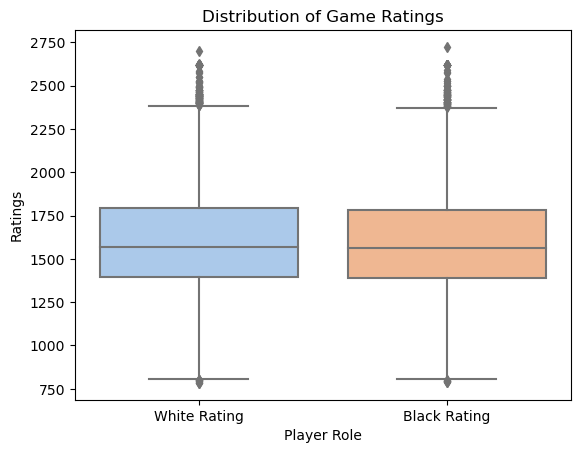

In [17]:
plt.figure()
sns.boxplot(data=data[['white_rating', 'black_rating']], palette='pastel')
plt.title("Distribution of Game Ratings" )
plt.ylabel("Ratings")
plt.xlabel("Player Role")
plt.xticks([0, 1], ['White Rating', 'Black Rating'])
plt.show()

In [18]:
df_with_dummies_corr = df_with_dummies.corr()
df_with_dummies_corr

,white_rating,black_rating,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,opening_Benoni Defense,...,opening_Valencia Opening,opening_Van Geet Opening,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening,winner_binary
white_rating,1.000000,0.634171,-0.006208,-0.015500,0.002462,0.006991,-0.008368,-0.000999,0.040458,0.032803,...,0.000276,-0.034314,-0.118321,-0.020163,0.006596,-0.006270,-0.032598,0.007324,0.007597,0.128577
black_rating,0.634171,1.000000,0.015168,-0.017901,-0.004321,-0.003126,-0.024297,-0.003323,0.044976,0.035115,...,0.008423,-0.015085,-0.075245,-0.024054,0.005839,-0.006368,-0.026050,0.015884,-0.004988,-0.171172
opening_Amar Opening,-0.006208,0.015168,1.000000,-0.000457,-0.000952,-0.000187,-0.000747,-0.000264,-0.000835,-0.001507,...,-0.000187,-0.001423,-0.003613,-0.002192,-0.000264,-0.000647,-0.000915,-0.000835,-0.003450,0.003849
opening_Amazon Attack,-0.015500,-0.017901,-0.000457,1.000000,-0.000623,-0.000122,-0.000489,-0.000173,-0.000546,-0.000986,...,-0.000122,-0.000932,-0.002365,-0.001435,-0.000173,-0.000423,-0.000599,-0.000546,-0.002258,-0.005718
opening_Anderssen Opening,0.002462,-0.004321,-0.000952,-0.000623,1.000000,-0.000254,-0.001018,-0.000360,-0.001138,-0.002054,...,-0.000254,-0.001940,-0.004925,-0.002988,-0.000360,-0.000881,-0.001247,-0.001138,-0.004702,0.011186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
opening_Ware Defense,-0.006270,-0.006368,-0.000647,-0.000423,-0.000881,-0.000173,-0.000691,-0.000244,-0.000773,-0.001395,...,-0.000173,-0.001318,-0.003345,-0.002029,-0.000244,1.000000,-0.000847,-0.000773,-0.003194,0.008224
opening_Ware Opening,-0.032598,-0.026050,-0.000915,-0.000599,-0.001247,-0.000244,-0.000978,-0.000346,-0.001093,-0.001974,...,-0.000244,-0.001864,-0.004732,-0.002870,-0.000346,-0.000847,1.000000,-0.001093,-0.004518,-0.008556
opening_Yusupov-Rubinstein System,0.007324,0.015884,-0.000835,-0.000546,-0.001138,-0.000223,-0.000893,-0.000315,-0.000998,-0.001801,...,-0.000223,-0.001701,-0.004319,-0.002620,-0.000315,-0.000773,-0.001093,1.000000,-0.004124,-0.003071
opening_Zukertort Opening,0.007597,-0.004988,-0.003450,-0.002258,-0.004702,-0.000922,-0.003688,-0.001303,-0.004124,-0.007442,...,-0.000922,-0.007029,-0.017844,-0.010824,-0.001303,-0.003194,-0.004518,-0.004124,1.000000,0.008911


In [19]:
#with open('correlation_matrix.csv', 'w') as file:
    #df_with_dummies_corr.to_csv(file)

## standardization 

In [20]:
# Standardize the white_rating and black_rating columns
white_rating_standardized = (df_with_dummies['white_rating'] - df_with_dummies['white_rating'].mean()) / df_with_dummies['white_rating'].std()
black_rating_standardized = (df_with_dummies['black_rating'] - df_with_dummies['black_rating'].mean()) / df_with_dummies['black_rating'].std()

# Create a new DataFrame with the standardized columns
standardized_df = pd.DataFrame({
    'white_rating_standardized': white_rating_standardized,
    'black_rating_standardized': black_rating_standardized
})

# Concatenate the standardized columns with the original DataFrame
df_with_dummies = pd.concat([df_with_dummies, standardized_df], axis=1)

# Drop the original columns
df_with_dummies.drop(['white_rating', 'black_rating'], axis=1, inplace=True)

# Display the first few rows to verify the changes
df_with_dummies.head()


,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,opening_Benoni Defense,opening_Bird Opening,opening_Bishop's Opening,...,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening,winner_binary,white_rating_standardized,black_rating_standardized
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.331779,-1.366951
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.942931,-1.126431
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.345513,-0.305227
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.541219,-0.463283
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.252810,-0.411743


In [21]:
# Rearrange the columns to move 'white_rating_standardized' and 'black_rating_standardized' to the first two positions
columns_order = ['white_rating_standardized', 'black_rating_standardized'] + [col for col in df_with_dummies.columns if col not in ['white_rating_standardized', 'black_rating_standardized']]

# Reorder the DataFrame columns
df_with_dummies = df_with_dummies[columns_order]

# Display the first few rows to verify the changes
df_with_dummies.head()

,white_rating_standardized,black_rating_standardized,opening_Amar Opening,opening_Amazon Attack,opening_Anderssen Opening,opening_Australian Defense,opening_Barnes Defense,opening_Barnes Opening,opening_Benko Gambit,opening_Benoni Defense,...,opening_Valencia Opening,opening_Van Geet Opening,opening_Van't Kruijs Opening,opening_Vienna Game,opening_Wade Defense,opening_Ware Defense,opening_Ware Opening,opening_Yusupov-Rubinstein System,opening_Zukertort Opening,winner_binary
0,-0.331779,-1.366951,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.942931,-1.126431,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.345513,-0.305227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.541219,-0.463283,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.252810,-0.411743,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model 

In [22]:
y = df_with_dummies["winner_binary"]

In [23]:
print(list(df_with_dummies.columns))

['white_rating_standardized', 'black_rating_standardized', 'opening_Amar Opening', 'opening_Amazon Attack', 'opening_Anderssen Opening', 'opening_Australian Defense', 'opening_Barnes Defense', 'opening_Barnes Opening', 'opening_Benko Gambit', 'opening_Benoni Defense', 'opening_Bird Opening', "opening_Bishop's Opening", 'opening_Blackmar-Diemer Gambit', 'opening_Blumenfeld Countergambit', 'opening_Bogo-Indian Defense', 'opening_Borg Defense', 'opening_Budapest Defense', 'opening_Canard Opening', 'opening_Caro-Kann Defense', 'opening_Carr Defense', 'opening_Catalan Opening', 'opening_Center Game', 'opening_Clemenz Opening', 'opening_Colle System', 'opening_Crab Opening', 'opening_Creepy Crawly Formation', 'opening_Czech Defense', 'opening_Danish Gambit', 'opening_Doery Defense', 'opening_Duras Gambit', 'opening_Dutch Defense', 'opening_East Indian Defense', 'opening_Elephant Gambit', 'opening_English Defense', 'opening_English Opening', 'opening_Englund Gambit', 'opening_Englund Gambit C

In [24]:
x = df_with_dummies[['white_rating_standardized', 'black_rating_standardized', 'opening_Amar Opening', 'opening_Amazon Attack', 'opening_Anderssen Opening', 'opening_Australian Defense', 'opening_Barnes Defense', 'opening_Barnes Opening', 'opening_Benko Gambit', 'opening_Benoni Defense', 'opening_Bird Opening', "opening_Bishop's Opening", 'opening_Blackmar-Diemer Gambit', 'opening_Blumenfeld Countergambit', 'opening_Bogo-Indian Defense', 'opening_Borg Defense', 'opening_Budapest Defense', 'opening_Canard Opening', 'opening_Caro-Kann Defense', 'opening_Carr Defense', 'opening_Catalan Opening', 'opening_Center Game', 'opening_Clemenz Opening', 'opening_Colle System', 'opening_Crab Opening', 'opening_Creepy Crawly Formation', 'opening_Czech Defense', 'opening_Danish Gambit', 'opening_Doery Defense', 'opening_Duras Gambit', 'opening_Dutch Defense', 'opening_East Indian Defense', 'opening_Elephant Gambit', 'opening_English Defense', 'opening_English Opening', 'opening_Englund Gambit', 'opening_Englund Gambit Complex', 'opening_Four Knights Game', 'opening_Franco-Benoni Defense', 'opening_French Defense', "opening_Gedult's Opening", 'opening_Giuoco Piano', 'opening_Global Opening', 'opening_Goldsmith Defense', 'opening_Grob Opening', 'opening_Gruenfeld Defense', 'opening_Guatemala Defense', 'opening_Gunderam Defense', 'opening_Hippopotamus Defense', 'opening_Horwitz Defense', 'opening_Hungarian Opening', 'opening_Indian Game', 'opening_Irish Gambit', 'opening_Italian Game', 'opening_Kadas Opening', 'opening_Kangaroo Defense', "opening_King's Gambit", "opening_King's Indian", "opening_King's Indian Attack", "opening_King's Indian Defense", "opening_King's Knight Opening", "opening_King's Pawn", "opening_King's Pawn Game", "opening_King's Pawn Opening", 'opening_Latvian Gambit', 'opening_Lemming Defense', 'opening_Lion Defense', 'opening_London System', 'opening_Mexican Defense', 'opening_Mieses Opening', 'opening_Mikenas Defense', 'opening_Modern Defense', 'opening_Neo-Gruenfeld Defense', 'opening_Nimzo-Indian Defense', 'opening_Nimzo-Larsen Attack', 'opening_Nimzowitsch Defense', 'opening_Nimzowitsch-Larsen Attack', 'opening_Old Benoni Defense', 'opening_Old Indian', 'opening_Old Indian Defense', 'opening_Owen Defense', 'opening_Paleface Attack', 'opening_Petrov', "opening_Petrov's Defense", 'opening_Philidor Defense', 'opening_Pirc Defense', 'opening_Polish Defense', 'opening_Polish Opening', 'opening_Ponziani Opening', 'opening_Portuguese Opening', 'opening_Pterodactyl Defense', "opening_Queen's Gambit", "opening_Queen's Indian Accelerated", "opening_Queen's Indian Defense", "opening_Queen's Pawn", "opening_Queen's Pawn Game", "opening_Queen's Pawn Opening", 'opening_Rat Defense', 'opening_Reti Opening', 'opening_Richter-Veresov Attack', 'opening_Robatsch (Modern) Defense', 'opening_Rubinstein Opening', 'opening_Russian Game', 'opening_Ruy Lopez', 'opening_Saragossa Opening', 'opening_Scandinavian Defense', 'opening_Scotch Gambit', 'opening_Scotch Game', 'opening_Semi-Bononi', 'opening_Semi-Slav Defense', 'opening_Sicilian Defense', 'opening_Slav Defense', 'opening_Slav Indian', 'opening_Sodium Attack', 'opening_St. George Defense', 'opening_System', 'opening_Tarrasch Defense', 'opening_Three Knights Opening', 'opening_Torre Attack', 'opening_Trompowsky Attack', 'opening_Valencia Opening', 'opening_Van Geet Opening', "opening_Van't Kruijs Opening", 'opening_Vienna Game', 'opening_Wade Defense', 'opening_Ware Defense', 'opening_Ware Opening', 'opening_Yusupov-Rubinstein System', 'opening_Zukertort Opening']]

## Train Split 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [27]:
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing data shape: {y_train.shape}")
print(f"Testing data shape: {y_test.shape}")

Training data shape: (16046, 129)
Testing data shape: (4012, 129)
Testing data shape: (16046,)
Testing data shape: (4012,)


In [28]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [29]:
reg.score(x_train,y_train)

0.6539947650504798

In [30]:
reg.intercept_

array([0.0250037])

In [31]:
reg.coef_

array([[ 1.0089449 , -1.08421164,  1.02632487, -0.39169826,  0.1451366 ,
         0.        ,  0.25383536, -0.06540014,  0.33432163, -0.68963162,
        -0.43971018,  0.19523559, -0.10358285,  0.56305762, -0.26758873,
        -0.04304458, -0.93807231,  0.00690358,  0.03333476,  0.27883865,
         0.38889463, -0.25061362, -0.26870856, -0.50269027, -0.98757296,
         0.19904346,  0.53532146,  0.53249528, -0.30988849,  0.39416257,
        -0.08471476, -0.28144599,  0.45464967,  0.00660582,  0.16380114,
         0.00950675,  0.74891408,  0.15709277,  0.71985121, -0.07125753,
        -0.06730808, -0.2242062 ,  0.31881763,  0.13012561, -0.82467358,
         0.33943767,  0.77380563,  0.56069158,  0.54969864,  0.01124874,
        -0.35019921, -0.40040025,  0.        , -0.09162059, -0.8738579 ,
        -0.39395298,  0.24756329,  0.17056742, -0.33717405, -0.04126298,
         0.31772921,  1.83235497, -0.07291244, -0.08999473, -0.04616193,
         0.25976924, -0.56506384, -0.70737332, -0.4

## Test

In [32]:
reg.score(x_test,y_test)

0.6483050847457628

In [36]:
from sklearn import metrics
predictions = reg.predict( x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3516949152542373
MSE: 0.3516949152542373
RMSE: 0.5930387131159629


## conclusion
This model isn't terrible, as it demonstrates some predictive power with a decent 0.65 score, especially considering chess is one of the most difficult games to predict, and both players typically have a 50/50 chance of winning.